# Import ? 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Charger les données ?  

In [ ]:
path = "./Automobiles.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()


(58, 11)


,Unnamed: 0,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


# Supp les col non nécessaires ? 

In [ ]:
#utiliser alternativement le drop et le del pour supp les col non nécessaires
# Colonnes à retirer
to_drop = [c for c in ["Unnamed: 0", "index"] if c in df.columns]
df = df.drop(columns=to_drop)

print("Colonnes supprimées :", to_drop)


Colonnes supprimées : ['Unnamed: 0', 'index']


# Les requetes ? 

In [20]:
#Requête 1 : Afficher le détail de toutes les voitures de marque Toyota
#format de la requête : liste de projection (select ???? from ...)
#suivi par le WHERE : condition de sélection
print("\nTypes :\n", df.dtypes)




Types :
 Unnamed: 0            int64
index                 int64
company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object


In [34]:
#solution 2 : Req2 ; nbre de voiture par marque / Equivalent du GROUP BY en SQL ? 

# Groupement par la colonne 'company' et comptage
# Comptage par marque (équivalent GROUP BY COUNT)
nb_voitures_par_marque = (
    df.groupby("company")
      .size()
      .reset_index(name="nb_voitures")
      .sort_values("nb_voitures", ascending=False)
)

print("Nombre de voitures par marque :")
print(nb_voitures_par_marque)

# Equivalent SQL :
# SELECT company, COUNT(*) FROM automobiles GROUP BY company;


# comment faire le parcours du résultats du group_by group par group
# Solution 2 : Req2 — Nombre de voitures par marque

for marque, groupe in df.groupby("company"):
    print(f"\n Marque : {marque}")
    print(f"Nombre de voitures : {len(groupe)}")
    print(groupe.head()) 





Nombre de voitures par marque :
          company  nb_voitures
13         toyota            7
2             bmw            6
8           mazda            5
11         nissan            5
9   mercedes-benz            4
1            audi            4
14     volkswagen            4
10     mitsubishi            4
3       chevrolet            3
0     alfa-romero            3
7          jaguar            3
5           honda            3
12        porsche            2
4           dodge            2
15          volvo            2
6           isuzu            1

 Marque : alfa-romero
Nombre de voitures : 3
       company   body-style  wheel-base  length engine-type num-of-cylinders  \
0  alfa-romero  convertible        88.6   168.8        dohc             four   
1  alfa-romero  convertible        88.6   168.8        dohc             four   
2  alfa-romero    hatchback        94.5   171.2        ohcv              six   

   horsepower  average-mileage    price  
0         111               21  

In [35]:
#Requête 2 : afficher les données ... pour la voiture ayant le prix le plus élevé

voiture_plus_chere = df.loc[df["price"].idxmax()]

print(" Voiture ayant le prix le plus élevé :")
display(voiture_plus_chere)



 Voiture ayant le prix le plus élevé :


company             mercedes-benz
body-style                hardtop
wheel-base                  112.0
length                      199.2
engine-type                  ohcv
num-of-cylinders            eight
horsepower                    184
average-mileage                14
price                     45400.0
Name: 33, dtype: object

In [8]:
#Nombre de voitures par compagnie
# Req3

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: company, dtype: int64

In [9]:
#Requête 4 : le prix le plus élevé par compagnie
# Req4

C:\Users\DELL\AppData\Local\Temp/ipykernel_10956/798265850.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Req4= groupement_marque['company','price'].max()


,company,price
company,,
alfa-romero,alfa-romero,16500.0
audi,audi,18920.0
bmw,bmw,41315.0
chevrolet,chevrolet,6575.0
dodge,dodge,6377.0
honda,honda,12945.0
isuzu,isuzu,6785.0
jaguar,jaguar,36000.0
mazda,mazda,18344.0


In [10]:
#Requête 5 : afficher la moyenne de kilométrage par compagnie
# Req5

C:\Users\DELL\AppData\Local\Temp/ipykernel_10956/1806345835.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Req5=groupement_marque['company','average-mileage'].mean()


,average-mileage
company,
alfa-romero,20.333333
audi,20.000000
bmw,19.000000
chevrolet,41.000000
dodge,31.000000
honda,26.333333
isuzu,24.000000
jaguar,14.333333
mazda,28.000000


In [11]:
#Requête 6 : trier toutes les voitures par prix
# Req6

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
13,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
25,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
45,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
34,mitsubishi,hatchback,93.7,157.3,ohc,four,68,37,5389.0
26,mazda,hatchback,93.1,159.1,ohc,four,68,31,6095.0
35,mitsubishi,hatchback,93.7,157.3,ohc,four,68,31,6189.0
17,dodge,hatchback,93.7,157.3,ohc,four,68,31,6229.0
14,chevrolet,hatchback,94.5,155.9,ohc,four,70,38,6295.0
46,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
16,dodge,hatchback,93.7,157.3,ohc,four,68,31,6377.0


# Produire les visualisations suivantes ? 

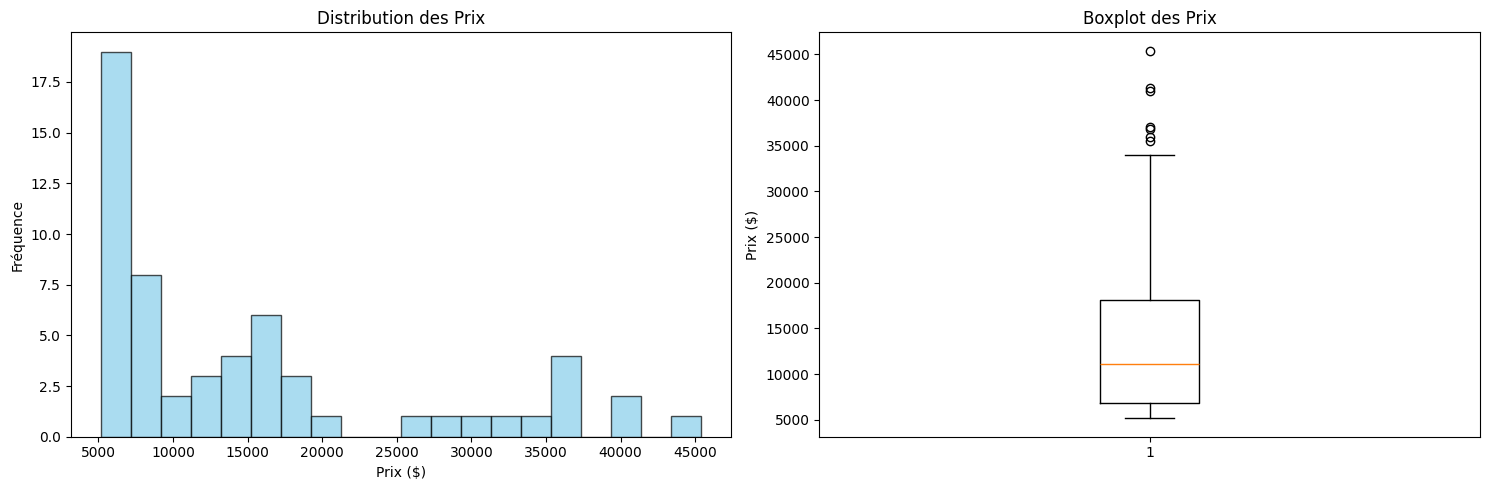

Prix moyen: $15387.00
Prix médian: $11095.00
Prix min: $5151.00
Prix max: $45400.00


In [37]:
# Distribution de la variable cible (prix)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme
axes[0].hist(df['price'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution des Prix')
axes[0].set_xlabel('Prix ($)')
axes[0].set_ylabel('Fréquence')

# Boxplot
axes[1].boxplot(df['price'])
axes[1].set_title('Boxplot des Prix')
axes[1].set_ylabel('Prix ($)')

plt.tight_layout()
plt.show()

print(f"Prix moyen: ${df['price'].mean():.2f}")
print(f"Prix médian: ${df['price'].median():.2f}")
print(f"Prix min: ${df['price'].min():.2f}")
print(f"Prix max: ${df['price'].max():.2f}")

# Corrélations

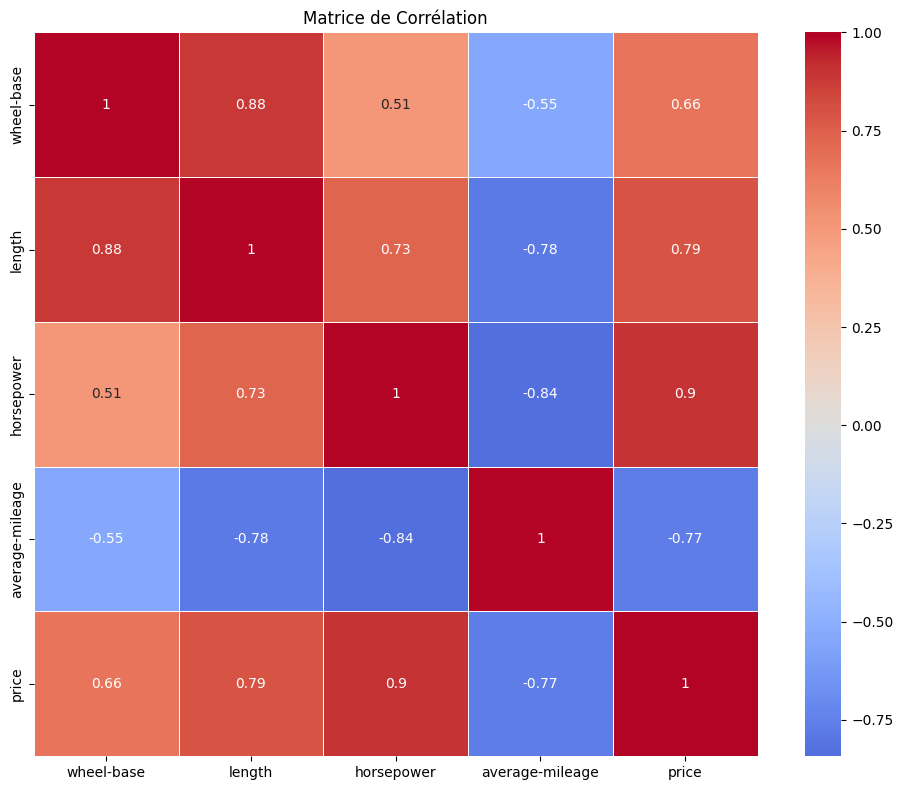

In [43]:
numeric_data = df[['wheel-base', 'length', 'horsepower', 'average-mileage', 'price']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

# Prédire le prix d'une voiture en fonction de `horsepower`

In [45]:
# Copie du dataframe pour le preprocessing
df_processed = df.copy()

# Encodage des variables catégorielles
categorical_features = ['company', 'body-style', 'engine-type', 'num-of-cylinders']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df_processed[f'{feature}_encoded'] = le.fit_transform(df_processed[feature])
    label_encoders[feature] = le
    print(f"Encodage de {feature}: {len(le.classes_)} classes")

# Sélection des features pour l'entraînement
feature_columns = ['wheel-base', 'length', 'horsepower', 'average-mileage'] + \
                  [f'{feat}_encoded' for feat in categorical_features]

X = df_processed[feature_columns]
y = df_processed['price']

print(f"\nFeatures sélectionnées: {feature_columns}")
print(f"Shape des features (X): {X.shape}")
print(f"Shape de la cible (y): {y.shape}")

Encodage de company: 16 classes
Encodage de body-style: 5 classes
Encodage de engine-type: 6 classes
Encodage de num-of-cylinders: 7 classes

Features sélectionnées: ['wheel-base', 'length', 'horsepower', 'average-mileage', 'company_encoded', 'body-style_encoded', 'engine-type_encoded', 'num-of-cylinders_encoded']
Shape des features (X): (58, 8)
Shape de la cible (y): (58,)


# Produire la visualisation suivante ? 

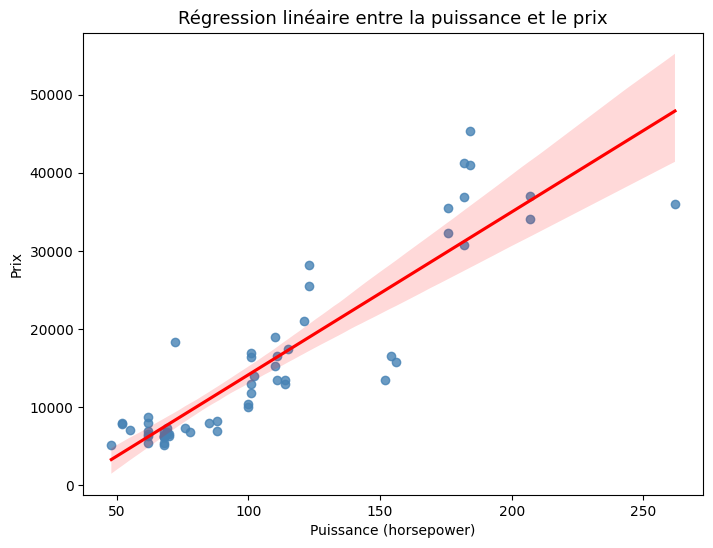

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(
    x="horsepower", 
    y="price", 
    data=df, 
    scatter_kws={"color": "steelblue"},   # couleur des points
    line_kws={"color": "red"},            # couleur de la droite
    ci=95                                 # intervalle de confiance (par défaut)
)

plt.title("Régression linéaire entre la puissance et le prix", fontsize=13)
plt.xlabel("Puissance (horsepower)")
plt.ylabel("Prix")
plt.show()